In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import multivariate_normal as binorm
from scipy.integrate import dblquad
from scipy.optimize import root_scalar as root
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
from core.core import *
from core.model3 import Stage1

mu = 103
mustar = 100
sigma = sig = 20
lam = 1000
rsquared = 0.2
rho = 0.5
stage1 = Stage1(mu, mustar, sigma, rho, lam, rsquared)



Beware: 

- new notation is g(z, y, t) where y is the old xi.
- old notation is g(z, t, xi) 

In [2]:
# new k function 

def k(u, z, t):
    return finv(u) if f(z) < u else ginv(u, t, z)

# code to find the max z in the outer integral

def g2inv(t, const):
    return root(lambda z: g(z+const, t, z) - t, x0=0).root

def maxz(t, const):
    return finv(t) - const if const<=0 else g2inv(t, const)

def outer_lim(t, b, y, rho):
    return maxz(t, const=(y-b)/np.sqrt(1-rho**2))

# code to find the max u in the inner integral

def maxu(t, z, const):
    return f(z+const) if const<=0 else g(z+const, t, z)

def inner_lim(t, b, y, z, rho):
    return maxu(t, z, const=(y-b)/np.sqrt(1-rho**2))

In [3]:
def G(t, b, y, rho):
    sq = np.sqrt(1-rho**2)
    def integrand(s, z):
        f1 = phi( (b-rho**2*y) / (rho*sq) - z / rho )
        f2 = b - y + sq * (k(s, z, t) - z)
        return f1*f2
    return dblquad(
        integrand,
        -np.inf, outer_lim(t, b, y, rho),
        lambda z: t, lambda z: inner_lim(t, b, y, z, rho)
    )[0]

def H(t, b, y, rho):
    return 1 - t + t * Phi( (b-rho*y) / np.sqrt(1-rho**2) )

def ratio(t, b, y, rho):
    return  G(t, b, y, rho) / H(t, b, y, rho)

def sum(t, b, y, rho):
    return (
        G(t, b, y, rho) +
        ( rho*(b-y) - ratio(t, b, b, rho) ) * H(t, b, y, rho)
    )

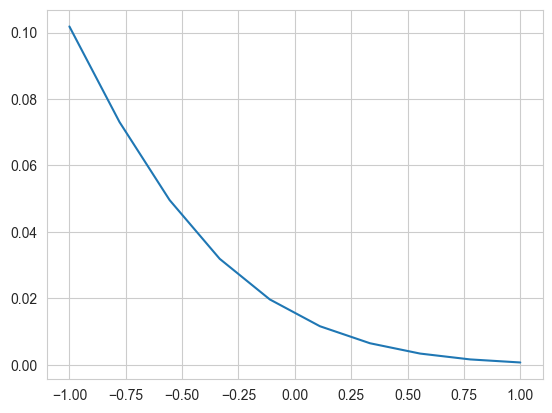

In [4]:
t = 0.5
b = (stage1.bdy(t) - mustar) / sigma
rho = 0.5
grid = np.linspace(-1, 1, 10)

plt.plot(grid, [ratio(t, b, y, rho) for y in grid])

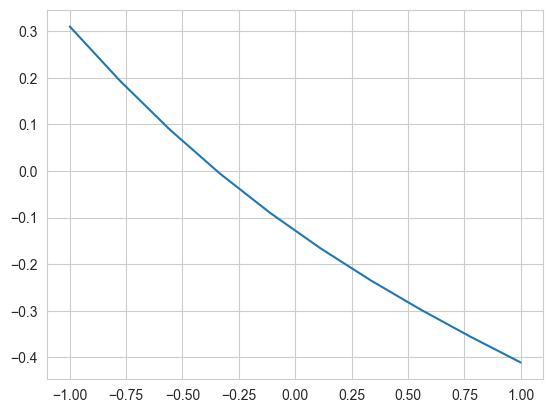

In [5]:
plt.plot(grid, [sum(t, b, y, rho) for y in grid])